In [291]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [292]:
api_key = 'Enter the api key'

channel_ids = ['UCF7BExjT2zH_mmyqOB139Dg', # Apni Kaksha
               'UCVJU_IChPMOe8RWkdVQjtfQ', # JEE Wallah 
               'UC7btqG2Ww0_2LwuQxpvo2HQ', # ProgrammingWithHarry 
               'UCVtL0esgwmD3bEZ2iNUjzHw', # Apni Kaksha NEET
               'UCmXZxX_qexEZxhb5_vQKPCw' # Aman Dhattarwal 
              ]
channel_ids2 = [

]
youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel stats


In [293]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [294]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [295]:
channel_data = pd.DataFrame(channel_statistics)

In [296]:
channel_data = pd.DataFrame(channel_statistics)

In [297]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

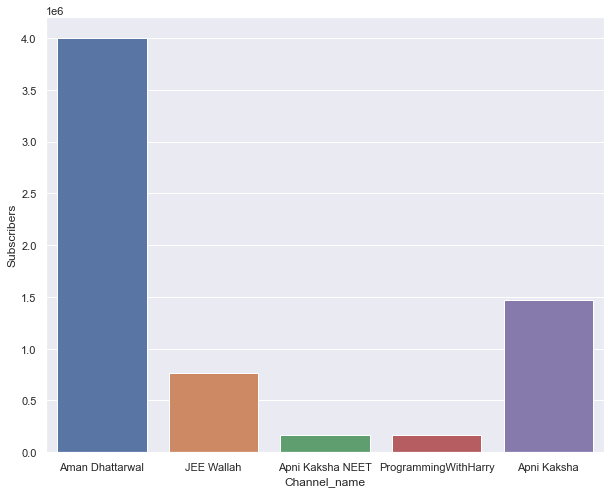

In [298]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

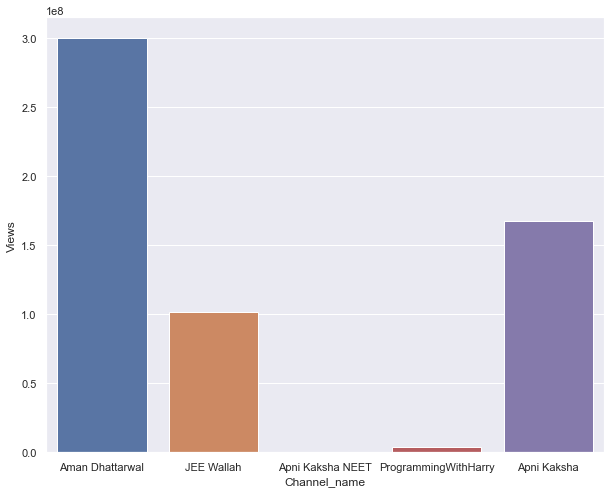

In [299]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

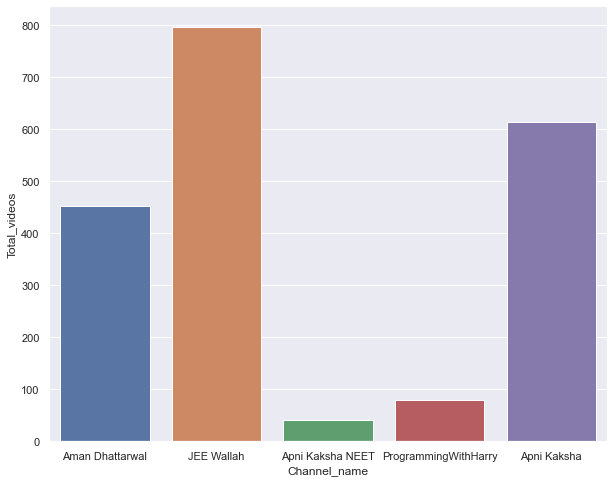

In [300]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

In [301]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Aman Dhattarwal,4000000,299922973,452,UUmXZxX_qexEZxhb5_vQKPCw
1,JEE Wallah,763000,101604899,796,UUVJU_IChPMOe8RWkdVQjtfQ
2,Apni Kaksha NEET,167000,484591,41,UUVtL0esgwmD3bEZ2iNUjzHw
3,ProgrammingWithHarry,169000,3516534,80,UU7btqG2Ww0_2LwuQxpvo2HQ
4,Apni Kaksha,1470000,167292839,614,UUF7BExjT2zH_mmyqOB139Dg


In [302]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='JEE Wallah', 'playlist_id'].iloc[0]

In [303]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [304]:
video_ids = get_video_ids(youtube, playlist_id)

In [305]:
video_ids

['HHbpZf5tLYk',
 'jdaLTDMmKQg',
 'rjZWx5cW5yA',
 'uzWcFQ7cMAg',
 'xipdasswvC8',
 'Fqm3ObKpoNA',
 'WIg6JJE4Mic',
 'DfB6JQ8weHc',
 '1t0zqmfqL3s',
 'rvs-ZW93isM',
 'Rw-ZTuBRU8o',
 '6jAIEf3rHBk',
 'CJr13R8_UDo',
 'YtEtJxQ1O68',
 'OajY0s_4iJU',
 '_-f8i5Tnhw8',
 '30CtzJ4joEA',
 'P0_W-_Pofzw',
 'vydDwgb7bHc',
 'eR9CYYx8ots',
 'H8YybnAnI3E',
 'wK0r2dCbpvM',
 'bSJzGn8pQvA',
 'Ht0GpMTht-Y',
 'xbaLUHjPsRw',
 'bO1Uz9E-nlI',
 'r87Nbs7KuTQ',
 'z8F45RH-79M',
 'ZpQtsWZUYK4',
 'efcP0Y1aDW0',
 'kcpC9qpDjOY',
 'y5eTm1SkNt4',
 'i_OLuqtHqgQ',
 '2S6AUTzPCaU',
 'FdiOQGvAuuU',
 '53J7nbLtTnQ',
 'P2AJSY0wEWo',
 'mbNRA9oIYQg',
 'FfRmhuVS57A',
 'kw12nrsktnc',
 'B8hRvuAOaYU',
 '-bC5Pyv7KLI',
 'bIF0Fmq94Gw',
 '6yY0Fxwybtc',
 'Nf0H6ROeCx0',
 'iPOxMOCOIpY',
 'YqaaYsckvF8',
 '-MkCBJ9uMvc',
 'tkDkeopn8JE',
 'bl-hlgQlM90',
 'EpYK9kdKxIk',
 'stgqsc2sIZ8',
 'kOQ0TQXurxY',
 'y9wwx5NjWnQ',
 'TjCWDGenZ10',
 'urEsdx9xfKI',
 '9Zio8pPGiOQ',
 'P15MmCK0alI',
 '9suEN7Pxt0g',
 '4zrpLhKQADA',
 'wKwRvmCzhQk',
 'vAI4ws7Whtc',
 'i4UeTw

## Function to get video details

In [306]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Favorite = video['statistics']['favoriteCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
            
    
    return all_video_stats

In [307]:
video_details = get_video_details(youtube, video_ids)

In [308]:
video_data = pd.DataFrame(video_details)

In [309]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Favorite'] = pd.to_numeric(video_data['Favorite'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Favorite,Comments
0,"""समय"" Ki Importance Samjho 🤗",2022-06-23,10482,2213,0,30
1,Good Luck & Best Wishes 😇 to all JEE MAIN 2022...,2022-06-22,105634,11690,0,712
2,JEE MAIN me kal FOD ke aana hai !!! 🔥🔥,2022-06-22,96287,11092,0,239
3,Kya PW bhi Badal Jayega? 🥺,2022-06-22,33288,3593,0,78
4,"""Time"" सबसे कीमती है 🔥",2022-06-22,35527,4687,0,36
...,...,...,...,...,...,...
791,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1556109,51015,0,4594
792,"Basic Mathematics in 1 Shot - All Concepts, Tr...",2021-06-01,708375,32812,0,1163
793,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2287414,70636,0,3954
794,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1496166,61002,0,3523


In [310]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [311]:
top10_videos

,Title,Published_date,Views,Likes,Favorite,Comments
77,Alakh Sir ने कितने लोगों को रोजगार दिया है? SI...,2022-06-05,3122804,302812,0,669
793,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2287414,70636,0,3954
786,"Atomic Structure in 1 Shot - All Concepts, Tri...",2021-06-06,1948759,60720,0,2918
691,Complete ORGANIC CHEMISTRY in 6 Hours - Best R...,2021-07-21,1809951,54630,0,2792
181,Alakh sir SECRET Suggestion🤫,2022-04-28,1754340,185943,0,362
154,Bachpan की Maths 😂,2022-05-15,1581923,117166,0,905
791,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1556109,51015,0,4594
148,"""Mehfil"" खुद की, चर्चे हमारे😂",2022-05-17,1504791,138788,0,205
794,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1496166,61002,0,3523
787,"Complex Numbers in 1 Shot - All Concepts, Tric...",2021-06-05,1328856,45849,0,2505


c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rajha\.conda\envs\YT-env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_fig

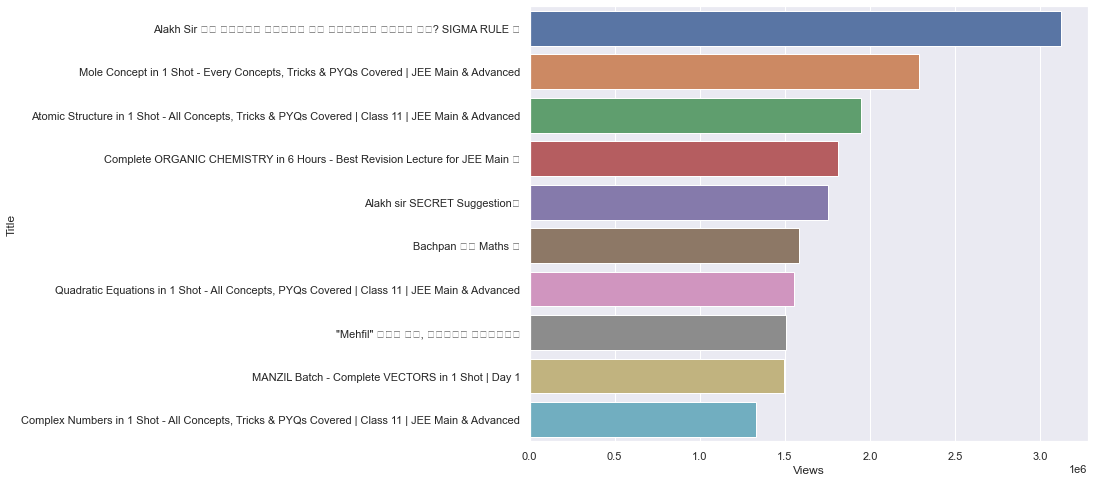

In [312]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [313]:
video_data

,Title,Published_date,Views,Likes,Favorite,Comments
0,"""समय"" Ki Importance Samjho 🤗",2022-06-23,10482,2213,0,30
1,Good Luck & Best Wishes 😇 to all JEE MAIN 2022...,2022-06-22,105634,11690,0,712
2,JEE MAIN me kal FOD ke aana hai !!! 🔥🔥,2022-06-22,96287,11092,0,239
3,Kya PW bhi Badal Jayega? 🥺,2022-06-22,33288,3593,0,78
4,"""Time"" सबसे कीमती है 🔥",2022-06-22,35527,4687,0,36
...,...,...,...,...,...,...
791,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1556109,51015,0,4594
792,"Basic Mathematics in 1 Shot - All Concepts, Tr...",2021-06-01,708375,32812,0,1163
793,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2287414,70636,0,3954
794,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1496166,61002,0,3523


In [314]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [315]:
video_data

,Title,Published_date,Views,Likes,Favorite,Comments,Month
0,"""समय"" Ki Importance Samjho 🤗",2022-06-23,10482,2213,0,30,Jun
1,Good Luck & Best Wishes 😇 to all JEE MAIN 2022...,2022-06-22,105634,11690,0,712,Jun
2,JEE MAIN me kal FOD ke aana hai !!! 🔥🔥,2022-06-22,96287,11092,0,239,Jun
3,Kya PW bhi Badal Jayega? 🥺,2022-06-22,33288,3593,0,78,Jun
4,"""Time"" सबसे कीमती है 🔥",2022-06-22,35527,4687,0,36,Jun
...,...,...,...,...,...,...,...
791,"Quadratic Equations in 1 Shot - All Concepts, ...",2021-06-02,1556109,51015,0,4594,Jun
792,"Basic Mathematics in 1 Shot - All Concepts, Tr...",2021-06-01,708375,32812,0,1163,Jun
793,"Mole Concept in 1 Shot - Every Concepts, Trick...",2021-05-30,2287414,70636,0,3954,May
794,MANZIL Batch - Complete VECTORS in 1 Shot | Day 1,2021-05-28,1496166,61002,0,3523,May


In [316]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [317]:
videos_per_month

,Month,size
0,Apr,39
1,Aug,18
2,Dec,94
3,Feb,95
4,Jan,90
5,Jul,80
6,Jun,127
7,Mar,57
8,May,80
9,Nov,80


In [318]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [319]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [320]:
videos_per_month = videos_per_month.sort_index()

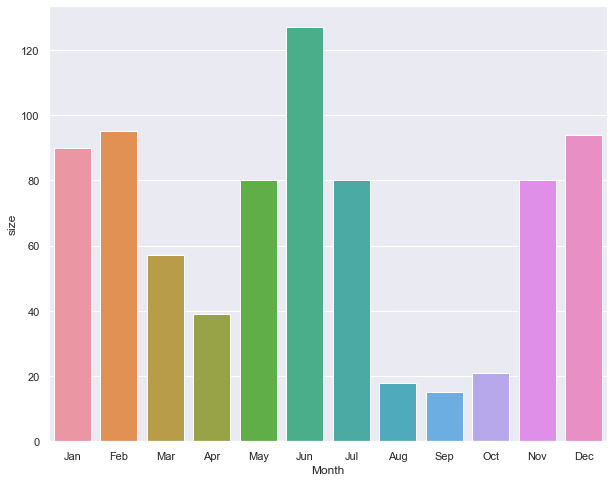

In [321]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [322]:
video_data.to_csv('Video_Details(JEE Wallah).csv')